In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import numpy as np
sns.set()


In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(df_test.columns)
print(df_test)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                     

In [3]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1)
df_test_id = pd.DataFrame()
df_test_id.index = df_test['PassengerId']
df_test = df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1)


In [4]:
print(df_test_id)

Empty DataFrame
Columns: []
Index: [892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, ...]

[418 rows x 0 columns]


In [5]:
df['Sex'] = pd.factorize(df['Sex'])[0]
df_test['Sex'] = pd.factorize(df_test['Sex'])[0]
print(df)

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    0  22.0      1      0   7.2500        S
1           1       1    1  38.0      1      0  71.2833        C
2           1       3    1  26.0      0      0   7.9250        S
3           1       1    1  35.0      1      0  53.1000        S
4           0       3    0  35.0      0      0   8.0500        S
..        ...     ...  ...   ...    ...    ...      ...      ...
886         0       2    0  27.0      0      0  13.0000        S
887         1       1    1  19.0      0      0  30.0000        S
888         0       3    1   NaN      1      2  23.4500        S
889         1       1    0  26.0      0      0  30.0000        C
890         0       3    0  32.0      0      0   7.7500        Q

[891 rows x 8 columns]


In [6]:
pd.get_dummies(df, prefix=['Embarked'])


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,0,1
887,1,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,1,NaN,1,2,23.4500,0,0,1
889,1,1,0,26.0,0,0,30.0000,1,0,0


In [7]:

df['Pclass'] = df['Pclass'].apply(str)
df = pd.get_dummies(df, prefix=['PClass','Embarked'])
df_test['Pclass'] = df_test['Pclass'].apply(str)
df_test = pd.get_dummies(df_test, prefix=['PClass','Embarked'])

<AxesSubplot:>

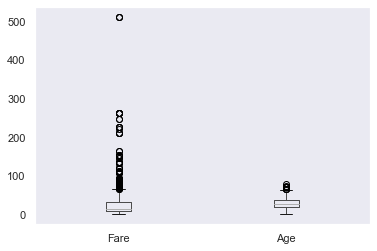

In [8]:

df.boxplot(column =['Fare', 'Age'], grid = False)

In [9]:
df['z_score']=scipy.stats.zscore(df['Fare'])
df.loc[df['z_score'].abs()>=3, 'Fare'] = df['Fare'].mean()
df = df.drop(['z_score'], axis=1)


<AxesSubplot:>

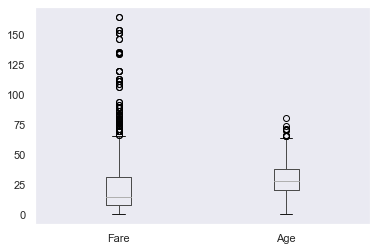

In [10]:
df.boxplot(column =['Fare', 'Age'], grid = False)

In [11]:
df.isnull().sum(axis = 0)
df = df.fillna(df.mean())
df.isnull().sum(axis = 0)

Survived      0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
PClass_1      0
PClass_2      0
PClass_3      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [12]:
df_test.isnull().sum(axis = 0)
df_test = df_test.fillna(df.mean())
df_test.isnull().sum(axis = 0)

Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
PClass_1      0
PClass_2      0
PClass_3      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [13]:
df['Age_id'] = 0
df.loc[df['Age']<= 15,'Age_id'] = '~15'
df.loc[(df['Age'] > 15) & (df['Age'] >= 25),'Age_id'] = '15~25'
df.loc[(df['Age'] > 25) & (df['Age'] >= 35),'Age_id'] = '15~25'
df.loc[(df['Age'] > 35) & (df['Age'] >= 45),'Age_id'] = '15~25'
df.loc[(df['Age'] > 45) & (df['Age'] >= 55),'Age_id'] = '15~25'
df.loc[df['Age'] > 55,'Age_id'] = '55~'
print(df['Age_id'].head())

0        0
1    15~25
2    15~25
3    15~25
4    15~25
Name: Age_id, dtype: object


In [14]:
df['Age']=(df['Age']-df['Age'].mean())/df['Age'].std()
df_test['Age']=(df_test['Age']-df_test['Age'].mean())/df_test['Age'].std()
df['Fare']=(df['Fare']-df['Fare'].mean())/df['Fare'].std()
df_test['Fare']=(df_test['Fare']-df_test['Fare'].mean())/df_test['Fare'].std()
print(df)

     Survived  Sex       Age  SibSp  Parch      Fare  PClass_1  PClass_2  \
0           0    0 -0.592148      1      0 -0.668494         0         0   
1           1    1  0.638430      1      0  1.537139         1         0   
2           1    1 -0.284503      0      0 -0.645244         0         0   
3           1    1  0.407697      1      0  0.910813         1         0   
4           0    0  0.407697      0      0 -0.640938         0         0   
..        ...  ...       ...    ...    ...       ...       ...       ...   
886         0    0 -0.207592      0      0 -0.470435         0         1   
887         1    1 -0.822881      0      0  0.115132         1         0   
888         0    1  0.000000      1      2 -0.110484         0         0   
889         1    0 -0.284503      0      0  0.115132         1         0   
890         0    0  0.176964      0      0 -0.651272         0         0   

     PClass_3  Embarked_C  Embarked_Q  Embarked_S Age_id  
0           1           0   

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


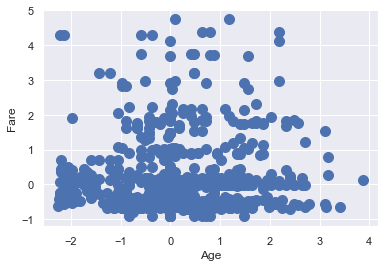

In [15]:
df.plot.scatter(x = 'Age', y = 'Fare', s = 100);

<AxesSubplot:>

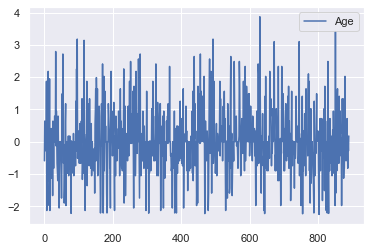

In [16]:
df.plot(y= 'Age', kind = 'line', use_index=True)

In [17]:
def correlationmatrix(dataframe):
    corrMatrix = dataframe.corr()
    sns.heatmap(corrMatrix, annot=True)
    plt.show()

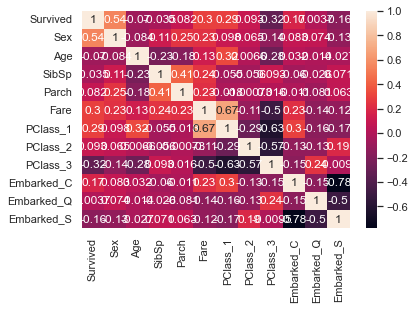

In [18]:
correlationmatrix(df)

In [19]:
def barchart_percentage(feature):
    survived_percentage = df[df['Survived'] ==1][feature].value_counts()/df[feature].value_counts()
    dead_percentage = df[df['Survived'] ==0][feature].value_counts()/df[feature].value_counts()
    df_analyse = pd.DataFrame([survived_percentage, dead_percentage])
    df_analyse.index = ['Survived', 'Dead']
    df_analyse.plot(kind='bar',stacked = False,figsize =(10,5))


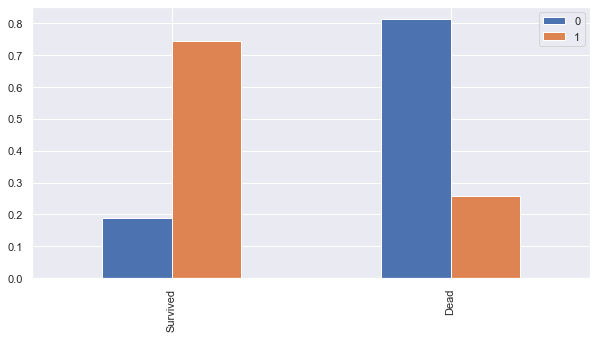

In [20]:
barchart_percentage('Sex')

In [21]:
def barchart(feature):
    survived = df[df['Survived'] ==1][feature].value_counts()
    dead = df[df['Survived'] ==0][feature].value_counts()
    df_analyse = pd.DataFrame([survived, dead])
    df_analyse.index = ['Survived', 'Dead']
    df_analyse.plot(kind='bar',stacked = False,figsize =(10,5))
    
    

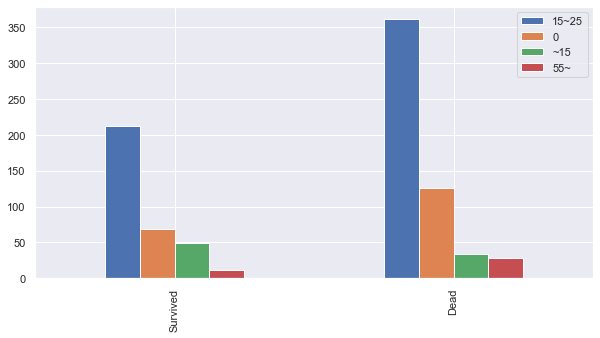

In [22]:
barchart('Age_id')

In [23]:
target_column = 'Survived' 
predictors = list(set(list(df.columns))-set([target_column, 'Age_id']))

print(target_column)
print(predictors)
predictors_test = list(set(list(df.columns))-set(['Age_id']))

Survived
['PClass_1', 'Fare', 'Embarked_S', 'Parch', 'Sex', 'Age', 'PClass_2', 'Embarked_C', 'Embarked_Q', 'SibSp', 'PClass_3']


In [24]:
X = df[predictors].values
y = df[target_column].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(623, 11)
(268, 11)


In [25]:
X_test_set =df_test[predictors].values

In [26]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

/Users/hidde/opt/anaconda3/envs/Deeploy/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=500)

In [27]:

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)
predict_test_set = mlp.predict(X_test_set)
df_test_id['Survived'] = 0
df_test_id['Survived'] = predict_test_set
df_test_id.to_csv('predictions.csv')
print(df_test_id)

             Survived
PassengerId          
892                 0
893                 0
894                 0
895                 0
896                 0
...               ...
1305                0
1306                1
1307                0
1308                0
1309                0

[418 rows x 1 columns]


In [28]:
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[371  22]
 [ 82 148]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       393
           1       0.87      0.64      0.74       230

    accuracy                           0.83       623
   macro avg       0.84      0.79      0.81       623
weighted avg       0.84      0.83      0.83       623



In [29]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[145  11]
 [ 35  77]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       156
           1       0.88      0.69      0.77       112

    accuracy                           0.83       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.83      0.83      0.82       268

